In [316]:
# from pomegranate import *
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.special
import math

__Create Fraud distribution__

In [317]:
number_t = 24*60
number_fraud_item = 1000

In [318]:
def dist_generate_one_items(number_t):
    rand = rd.randrange(1,10)
    n_dist_1 = round(number_t/rand)
    dist_1 = np.random.poisson(lam=rd.randrange(1,20), size = n_dist_1)
    dist_2 = np.random.poisson(lam=rd.randrange(15,100), size = number_t - n_dist_1)
    return np.hstack((dist_1, dist_2)) 

In [319]:
T = []
for i in range(number_fraud_item):
    dist = dist_generate_one_items(number_t)
    T.append(dist)
T = np.asarray(T)

(array([ 19., 140., 116.,  17.,  68., 276., 377., 318.,  96.,  13.]),
 array([ 4. , 10.4, 16.8, 23.2, 29.6, 36. , 42.4, 48.8, 55.2, 61.6, 68. ]),
 <a list of 10 Patch objects>)

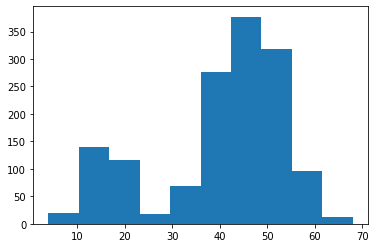

In [324]:
plt.hist(T[1])

__Some Utils__

In [325]:
def factorials(data):
    return scipy.special.factorial(data)

In [326]:
def poission_pdf(T, lambda_k, pi_k):
    s1 = lambda_k.reshape(1000,1)/factorials(T)
    s2 = math.e**(-lambda_k).reshape(1000,1)
    return s1*s2

_lambda_k and pi_k => Q_k => lambda_k and pi_k => repeating until convergenced_

In [327]:
# probability density function: 
def cal_pdf_1():
    return poission_pdf(T,lambda_1, pi_1)
def cal_pdf_2():
    return poission_pdf(T,lambda_2, pi_2)

In [328]:
def cal_Q1():
    return (cal_pdf_1() * pi_1) / ((cal_pdf_1() * pi_1 + cal_pdf_2() * pi_2))
def cal_Q2():
    return (cal_pdf_2() * pi_2) / ((cal_pdf_1() * pi_1 + cal_pdf_2() * pi_2))

In [329]:
def cal_Q1():
    return (pdf_1 * pi_1) / ((pdf_1 * pi_1 + pdf_2 * pi_2))
def cal_Q2():
    return (pdf_2 * pi_2) / (pdf_1 * pi_1 + pdf_2 * pi_2)

In [330]:
def cal_pi_1():
    return (sum(Q_1.T) / sum(Q_1.T).shape[0]).reshape(1000,1)
def cal_pi_2():
    return (sum(Q_2.T) / sum(Q_2.T).shape[0]).reshape(1000,1)

In [331]:
def cal_lambda_1():
    return sum((Q_1*T).T)/sum(Q_1.T)
def cal_lambda_2():
    return sum((Q_2*T).T)/sum(Q_2.T)

__Define some initial value for lambda(λ) and pi(π)__

In [332]:
n_cluster = 2 
lambda_1 = np.asarray([rd.randrange(1,100) for i in range(number_fraud_item)])
lambda_2 = np.asarray([rd.randrange(1,100) for i in range(number_fraud_item)])
pi_1 = np.asarray([rd.uniform(0,1) for i in range(number_fraud_item)]).reshape(number_fraud_item,1)
pi_2 = np.asarray([1 for i in range(number_fraud_item)]).reshape(number_fraud_item,1) - pi_1

In [333]:
Q_1 = cal_Q1()
Q_2 = cal_Q2()

In [334]:
Q_1.shape

(1000, 1440)

In [ ]:

# def iterate_until_convergence():
count = 0
Q1_temp = Q_1
Q2_temp = Q_2
# M - step
for i in range(10000):
    count+=1 
    pi_1 = cal_pi_1()
    pi_2 = cal_pi_2()
    lambda_1 = cal_lambda_1()
    lambda_2 = cal_lambda_2()
    Q_1 = cal_Q1()
    Q_2 = cal_Q2()
#     print('Q1', Q_1[:4,:1])
#     print('Q2', Q_2[:4,:1])
#     print('pi_1', pi_1[:4])
#     print('pi_2', pi_2[:4])
#     print('-----------------')
    if (Q_1 == Q1_temp).all() and (Q_2 == Q2_temp).all() or count == 999:
        print('done')
        print('Q1', Q_1[:4,:1])
        print('Q2', Q_2[:4,:1])
        print('pi_1', pi_1[:4])
        print('pi_2', pi_2[:4])
        break
#     return

UnboundLocalError: local variable 'Q_1' referenced before assignment